In [1]:
#import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
# load dataset
movies = pd.read_csv("data/IMDB_sample.csv", index_col=0)
movies

,review,label
18245,This short spoof can be found on Elite's Mille...,0
19801,A singularly unfunny musical comedy that artif...,0
3222,"An excellent series, masterfully acted and dir...",1
6010,The master of movie spectacle Cecil B. De Mill...,1
16355,I was gifted with this movie as it had such a ...,0
...,...,...
7334,Although this film is somewhat filled with eig...,1
11638,Bo Derek's beauty and John Derek's revolutiona...,1
19851,I have seen every episode of this spin off. I ...,0
8114,"A comedy gem. Lots of laugh out loud moments, ...",1


In [20]:
movies.label.value_counts()

0    3782
1    3719
Name: label, dtype: int64

In [26]:
sentiment_count=movies.groupby('label').count()
sentiment_count

,review
label,
0,3782
1,3719


In [62]:

from keras.preprocessing.text import Tokenizer

docs = movies.review.to_list()

## Step 1: Determine the Vocabulary
tokenizer = Tokenizer()
tokenizer.fit_on_texts(docs)
print(list(tokenizer.word_index.keys()))

## Step 2: Count
vectors = tokenizer.texts_to_matrix(docs, mode='count')
print(vectors)

['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i', 'this', 'that', 'was', 'as', 'for', 'movie', 'with', 'but', 'film', 'on', 'not', 'you', 'his', 'are', 'have', 'be', 'he', 'one', 'all', 'at', 'by', 'an', 'they', 'so', 'who', 'like', 'from', 'or', 'her', 'just', 'about', "it's", 'if', 'out', 'has', 'what', 'there', 'some', 'good', 'more', 'very', 'when', 'up', 'no', 'my', 'even', 'time', 'would', 'she', 'which', 'only', 'really', 'story', 'see', 'their', 'had', 'can', 'me', 'were', 'well', 'than', 'we', 'much', 'been', 'get', 'bad', 'because', 'people', 'first', 'also', 'other', 'will', 'into', 'do', 'him', 'great', 'how', 'most', 'made', "don't", 'its', 'make', 'way', 'then', 'too', 'them', 'any', 'could', 'movies', 'after', 'think', 'characters', 'two', 'watch', 'never', 'films', 'seen', 'being', 'many', 'character', 'did', 'acting', 'over', 'life', 'little', 'love', 'plot', 'where', 'know', 'show', 'best', 'does', 'better', 'end', 'ever', 'still', 'off', 'man', 'your', 'th

[[ 0. 10.  1. ...  0.  0.  0.]
 [ 0. 31. 11. ...  0.  0.  0.]
 [ 0.  9.  7. ...  0.  0.  0.]
 ...
 [ 0. 10.  4. ...  1.  0.  0.]
 [ 0.  6.  8. ...  0.  0.  0.]
 [ 0.  7.  1. ...  0.  1.  1.]]


In [63]:
vectors

array([[ 0., 10.,  1., ...,  0.,  0.,  0.],
       [ 0., 31., 11., ...,  0.,  0.,  0.],
       [ 0.,  9.,  7., ...,  0.,  0.,  0.],
       ...,
       [ 0., 10.,  4., ...,  1.,  0.,  0.],
       [ 0.,  6.,  8., ...,  0.,  0.,  0.],
       [ 0.,  7.,  1., ...,  0.,  1.,  1.]])

In [65]:
print(list(tokenizer.word_index.keys()))

['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i', 'this', 'that', 'was', 'as', 'for', 'movie', 'with', 'but', 'film', 'on', 'not', 'you', 'his', 'are', 'have', 'be', 'he', 'one', 'all', 'at', 'by', 'an', 'they', 'so', 'who', 'like', 'from', 'or', 'her', 'just', 'about', "it's", 'if', 'out', 'has', 'what', 'there', 'some', 'good', 'more', 'very', 'when', 'up', 'no', 'my', 'even', 'time', 'would', 'she', 'which', 'only', 'really', 'story', 'see', 'their', 'had', 'can', 'me', 'were', 'well', 'than', 'we', 'much', 'been', 'get', 'bad', 'because', 'people', 'first', 'also', 'other', 'will', 'into', 'do', 'him', 'great', 'how', 'most', 'made', "don't", 'its', 'make', 'way', 'then', 'too', 'them', 'any', 'could', 'movies', 'after', 'think', 'characters', 'two', 'watch', 'never', 'films', 'seen', 'being', 'many', 'character', 'did', 'acting', 'over', 'life', 'little', 'love', 'plot', 'where', 'know', 'show', 'best', 'does', 'better', 'end', 'ever', 'still', 'off', 'man', 'your', 'th

In [66]:
cleaned_array = np.array([elem[1:] for elem in vectors])

In [68]:
df_test = pd.DataFrame(columns=list(tokenizer.word_index.keys()), data = cleaned_array)
df_test

,the,and,a,of,to,is,br,in,it,i,...,extremly,indiania,gollam,'television,life',visitations,procure,pp,ligabue,carachters
0,10.0,1.0,4.0,12.0,2.0,0.0,2.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31.0,11.0,20.0,16.0,6.0,8.0,12.0,8.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.0,7.0,1.0,3.0,0.0,2.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,1.0,2.0,5.0,1.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,8.0,9.0,7.0,4.0,0.0,10.0,7.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,10.0,4.0,4.0,3.0,4.0,3.0,0.0,1.0,7.0,5.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7497,2.0,2.0,6.0,2.0,3.0,3.0,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7498,10.0,4.0,3.0,3.0,1.0,4.0,0.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7499,6.0,8.0,12.0,8.0,1.0,4.0,0.0,2.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the vector of targets and matrix of features
y = movies.label
X = df_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [72]:
# Build a logistic regression model and calculate the accuracy
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)



In [73]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[924, 225],
       [173, 929]])

Text(0.5, 257.44, 'Predicted label')

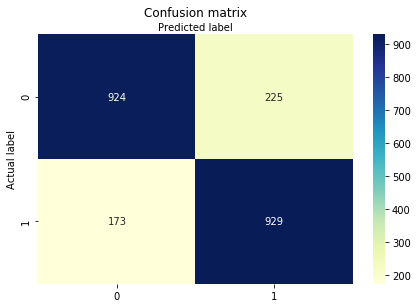

In [74]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [75]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.823189693469569
Precision: 0.8050259965337955
Recall: 0.8430127041742287


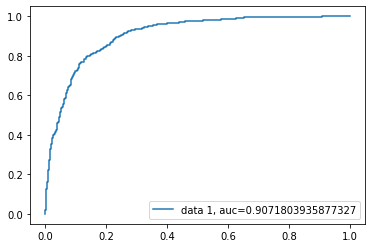

In [79]:
y_pred_proba = lr.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()